<hr>

<center>
    Class: Machine Learning in Computational Biology <br>
    Program: Data Science and Information Technologies <br>
    Name: Aris <br>
    Las name: Podotas <br>
    ID: 7115152400040 <br>
    Assignment: 1 <br>
</center>

<hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, median_absolute_error, r2_score # spoilers
from sklearn.svm import SVR
import sys
sys.path.append('../src/')
import functions as utils


<hr>

# Model development

<hr>

In [2]:
root = '../data/'
dev = pd.read_csv(root + 'development_final_data.csv')
dev.head(10)


,Unnamed: 0,Project ID,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,5,0,53.0,19.01,-0.116074,-0.151651,-0.366867,-0.154353,-0.357553,...,-0.264395,-0.445361,-0.178185,-0.497202,-0.161263,-0.315570,-0.357998,-0.129594,-0.214033,0.019673
1,1,3,1,21.0,23.50,-0.108980,-0.151651,-0.366867,-0.154353,2.663768,...,-0.329484,-0.500254,2.108974,-0.481538,-0.170765,-0.315570,0.118380,0.024110,0.196608,-0.210150
2,2,3,0,52.0,25.80,-0.106369,-0.151651,-0.366867,-0.019414,-0.361007,...,-0.329484,-0.494017,-0.162598,-0.461486,-0.170765,-0.315570,-0.357998,-0.129594,-0.199298,-0.180683
3,3,5,1,40.0,23.49,-0.116074,-0.106995,-0.026565,-0.154353,-0.351405,...,-0.134492,-0.100140,-0.178185,0.309746,-0.071131,0.515577,-0.357998,-0.129594,-0.230236,-0.221277
4,4,5,1,30.0,22.60,-0.096208,0.037702,8.788685,-0.154353,-0.158938,...,3.041408,-0.229310,-0.178185,-0.233995,0.005653,0.368071,0.740698,-0.129594,0.070595,-0.193578
5,5,5,0,21.0,26.25,-0.116074,-0.151651,-0.098344,-0.154353,-0.361661,...,-0.015685,0.851373,-0.178185,-0.266337,-0.134116,1.126658,-0.048239,-0.129594,-0.230236,-0.221277
6,6,3,0,52.0,25.80,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
7,7,3,0,52.0,25.80,-0.116074,-0.151651,-0.366867,-0.154353,-0.356727,...,-0.329484,-0.480737,-0.127764,-0.412476,-0.170765,-0.303152,-0.109969,-0.129594,-0.096795,-0.184801
8,8,5,0,42.0,24.75,-0.038767,-0.151651,-0.164834,-0.154353,-0.346040,...,-0.329484,0.512084,0.349503,-0.013537,0.515742,0.418302,-0.357998,-0.129594,-0.230236,-0.221277
9,9,5,0,67.0,28.70,-0.116074,-0.151651,1.196562,-0.154353,-0.334077,...,-0.210294,-0.395377,-0.178185,-0.332786,-0.170765,-0.006330,1.700952,-0.129594,-0.170893,-0.143415


In [3]:
val = pd.read_csv(root + 'evaluation_final_data.csv')
val.head(10)


,Unnamed: 0,Project ID,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,4,0,60.0,25.71,-0.116074,-0.151651,1.650796,-0.154353,-0.361661,...,-0.329484,5.356338,-0.178185,-0.150540,0.201753,-0.186600,0.214462,-0.129594,-0.172489,1.104695
1,1,3,0,57.0,27.20,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
2,2,4,0,65.0,22.35,-0.116074,-0.141051,-0.366867,-0.154353,-0.361174,...,-0.329484,-0.372927,-0.178185,-0.412069,-0.170765,0.027547,0.213126,-0.064780,-0.149578,-0.221277
3,3,4,0,55.0,25.52,-0.116074,-0.151651,-0.310890,-0.154353,-0.358443,...,-0.291242,-0.321765,-0.178185,-0.479618,-0.148433,-0.315570,-0.357998,0.084608,-0.039832,-0.187967
4,4,3,1,54.0,21.60,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
5,5,2,0,52.0,25.80,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
6,6,2,1,31.0,21.30,-0.104053,-0.151651,-0.366867,0.012793,-0.360851,...,-0.329484,-0.199699,-0.062342,-0.275997,-0.170765,-0.315570,-0.168048,-0.129594,0.066767,-0.162614
7,7,4,0,60.0,26.50,-0.116074,-0.151651,1.848313,-0.154353,-0.354795,...,0.183348,0.330150,-0.178185,1.796583,1.217694,0.341069,-0.127894,-0.129594,0.257216,-0.221277
8,8,4,0,65.0,23.75,-0.116074,-0.151651,0.403839,-0.154353,-0.226651,...,-0.186880,-0.057526,-0.142415,-0.464416,0.037422,-0.209858,-0.357998,-0.129594,-0.052734,-0.174698
9,9,4,0,66.0,25.75,-0.116074,-0.133429,-0.214568,0.536775,-0.358313,...,-0.329484,2.501243,-0.118310,-0.442323,-0.101069,-0.286078,2.194622,-0.055317,-0.210429,-0.143309


In [4]:
# Calling the models with all the fields because I'm curious to see if the "metadata" fields perform better

# Varible to hold model options
options = np.array([BayesianRidge, SVR, ElasticNet])
metrics = np.array([root_mean_squared_error, mean_absolute_error, median_absolute_error, r2_score]) # Look to the report or the readme for why this extra metric

# Defined in functions.py or the renamed utils
predictions = utils.regressions(options, dev.drop(columns = ['BMI']), dev['BMI'], val.drop(columns = ['BMI']))
scores = utils.applyMetrics(metrics, options, val['BMI'], predictions)


Function 'regressions' executed in 0.0632 seconds
Function 'applyMetrics' executed in 0.0050 seconds


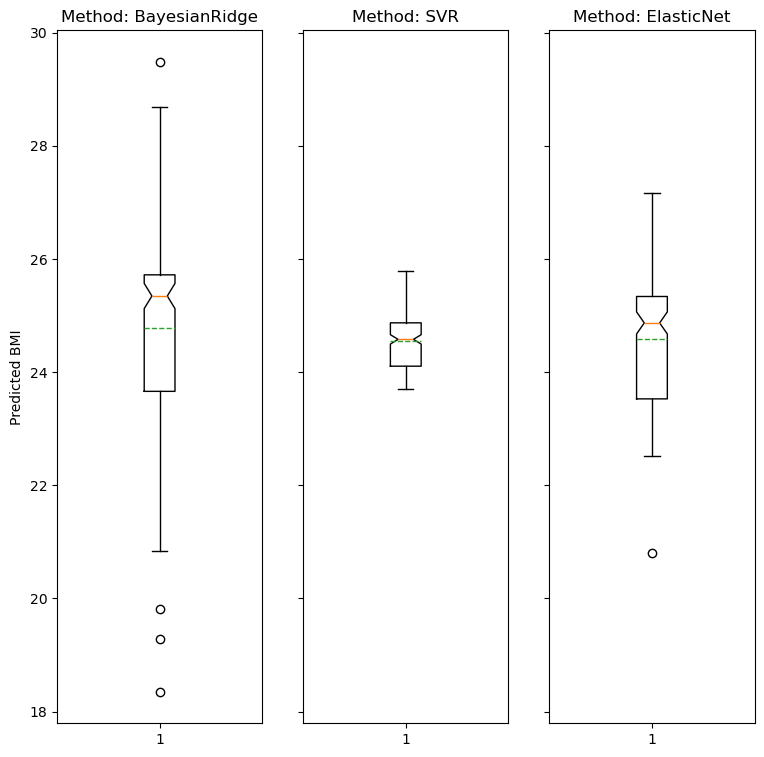

[[25.72192296 25.82965562 24.5704497  25.7351903  25.55738605 25.48379784
  22.23277817 28.54048058 26.35274565 25.86663071 23.36563427 23.65294957
  25.36187805 22.20120515 27.35805961 23.69629128 23.68030616 26.19537288
  26.24805295 24.80353778 23.90709639 23.7450534  26.98270175 25.19405501
  25.32652134 25.31397995 24.38826944 25.20551188 21.95693862 25.54756297
  22.46352044 24.1844329  21.60983164 25.58315046 25.38992461 23.99536467
  25.61046962 25.53590983 26.68407913 22.87187018 26.64167877 28.13694303
  25.37761013 22.63138526 24.99315307 25.02744511 21.86106396 18.34904011
  25.41704138 22.10700694 25.11237767 23.32746254 24.27218339 19.28984128
  24.15129297 26.42393119 25.50056589 25.42260041 25.53993833 26.39411781
  24.47650272 25.33590101 28.69472955 21.52515398 24.4123857  21.98639729
  24.07270191 25.35425631 25.37822865 22.54917134 24.4507297  26.45684681
  25.45486979 25.63014111 22.81624812 23.43274345 26.214532   25.35344478
  25.43802201 23.20166763 22.48927812 

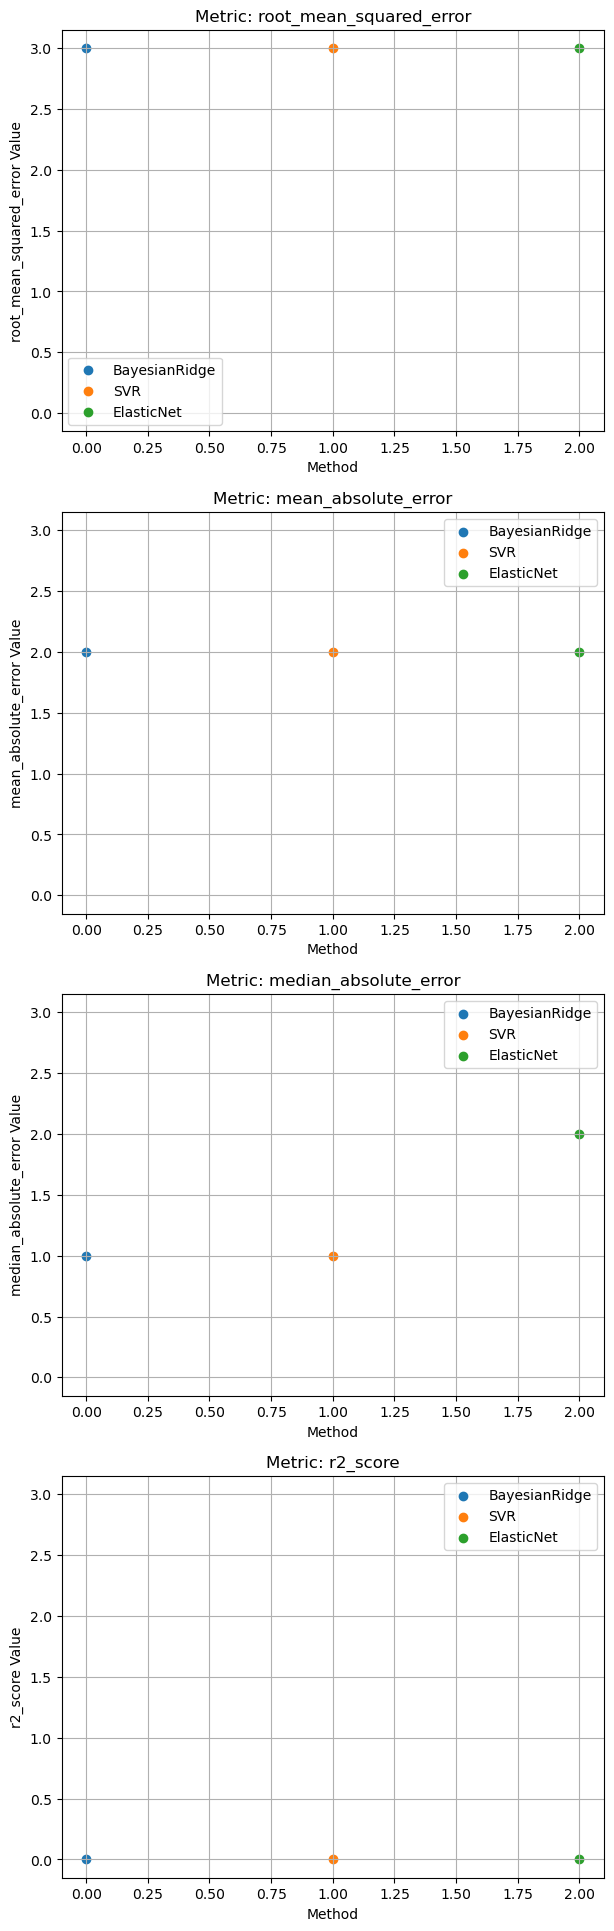

[[[3]
  [3]
  [3]]

 [[2]
  [2]
  [2]]

 [[1]
  [1]
  [2]]

 [[0]
  [0]
  [0]]]
Function 'visualiseEvaluations' executed in 0.5883 seconds


In [5]:
utils.visualisePredictions(predictions, options, verbose = True)
utils.visualiseEvaluations(scores, options, metrics, verbose = True)


<hr>

Remember that the above calls contain features such as ```Project ID```. The potential success of the median metric can be seen.

Now we will do the same for the actual baseline models of the task at hand, that being the ```BMI``` being our $y$ and the species being the $x$'s.

<hr>

In [6]:
# I'm going to split the development dataframe in data and metadata that I kept
devData, devMeta = utils.dataSplit(dev)
valData, valMeta = utils.dataSplit(val)
# Splitting data and validation to x's and y's
train, preds = utils.isolator(devData)
validation, truth = utils.isolator(valData)
predictions = utils.regressions(options, train, preds, validation)
scores = utils.applyMetrics(metrics, options, truth, predictions)


Function 'dataSplit' executed in 0.0000 seconds
Function 'dataSplit' executed in 0.0000 seconds
Function 'isolator' executed in 0.0000 seconds
Function 'isolator' executed in 0.0000 seconds
Function 'regressions' executed in 0.0429 seconds
Function 'applyMetrics' executed in 0.0045 seconds


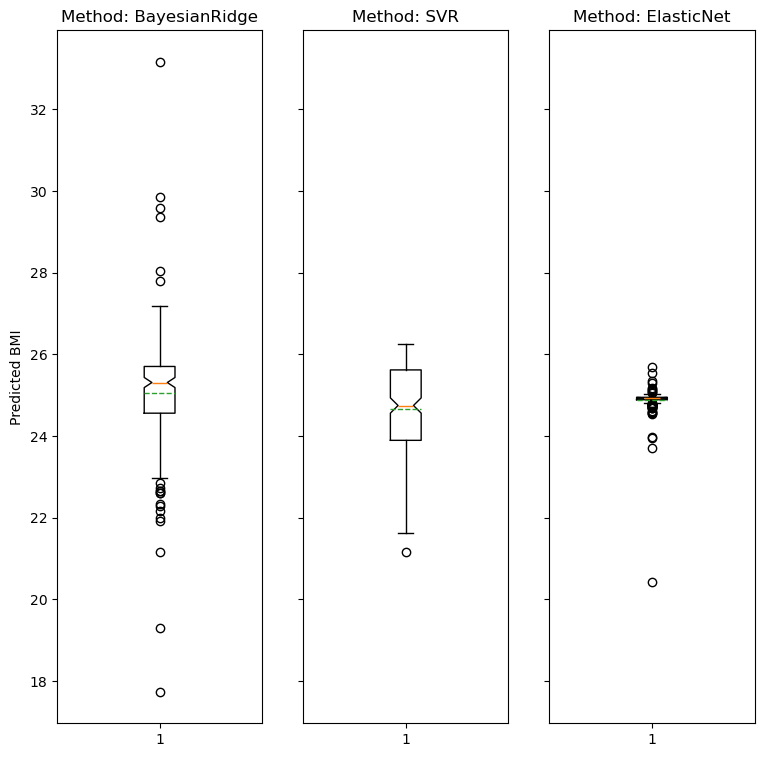

Function 'visualisePredictions' executed in 0.2237 seconds


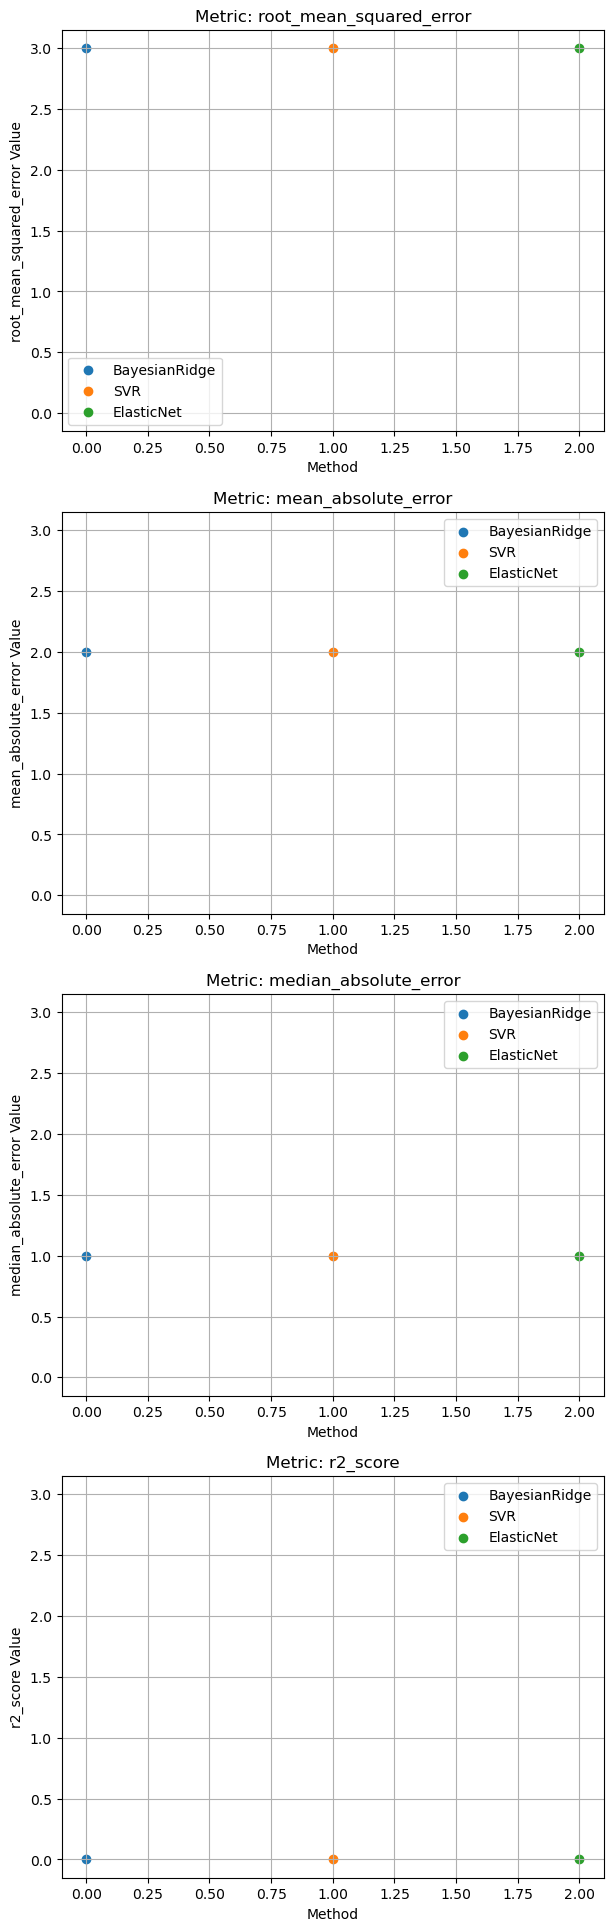

Function 'visualiseEvaluations' executed in 0.5988 seconds


In [9]:
utils.visualisePredictions(predictions, options, verbose = False)
utils.visualiseEvaluations(scores, options, metrics, verbose = False)


<hr>

# Baseline

## Data processing

<hr>

In [7]:
# PCA

<hr>

# Model evaluation

<hr>